In [2]:
import torch
import numpy as np
print(torch.__version__)

2.4.1


# Pytorch 张量(Tensor)
`Pytorch` 中的张量可以在不同的设备上进行加速计算, 可以用于实现自动求导等机制, 张量的类型可以根据维数来确定, 比如张量的类型如下:
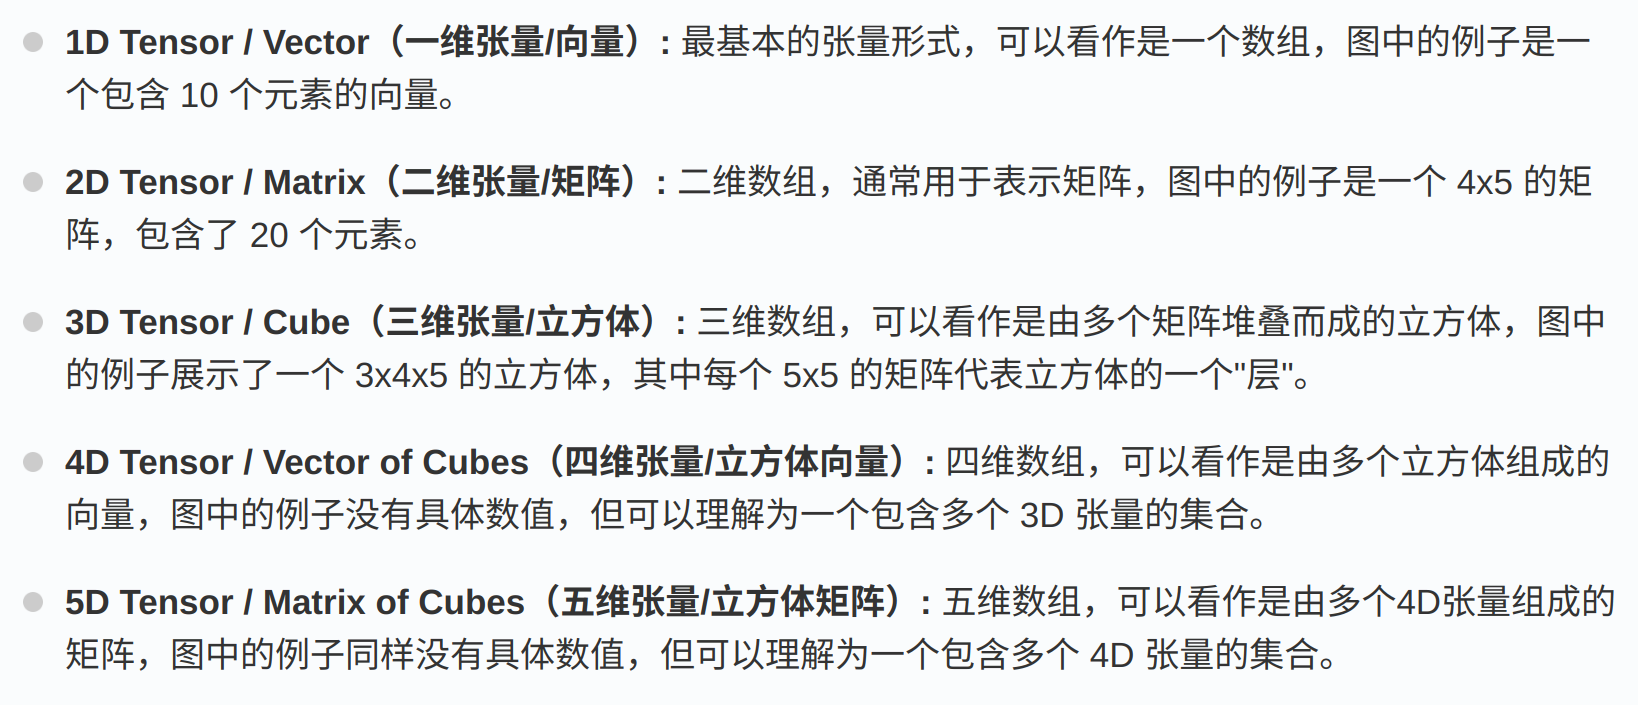

## 创建张量
张量的创建方式如下(类似于 `ndarray`):
- `torch.tensor(data)`: 从列表或者 `numpy` 数组创建张量
- `torch.zeros(size)`: 创建全为 `0` 的张量
- `torch.ones(size)`
- `torch.empty(size)`: 创建一个没有初始化的张量
- `torch.rand(size)`: 创建一个服从均匀分布的随机张量, 值在 `[0, 1)` 中
- `torch.randn(size)`: 创建一个服从正态分布的随机张量，均值为 0，标准差为 1
- `torch.arange(start, end, step)`: 创建一个一维序列张量，类似于 Python 的 range
- `torch.linspace(start, end, steps)`: 创建一个在指定范围内等间隔的序列张量(类似于上面一个方法)
- `torch.eye(size)`: 单位矩阵
- `torch.from_numpy(ndarray)`: 将 `numpy` 数组转换为张量

In [3]:
# 1. 创建张量
# 1.1 直接创建
v1 = torch.tensor([1, 2, 3])
n1 = np.array([[4, 5, 6], [7, 8 , 9]])
v2 = torch.tensor(n1)
print(v1)
print(v2)
print('=============')
# 1.2 torch.zeros
v3 = torch.zeros(2, 3)
print(v3)
print('=============')
# 1.3 torch.ones
v4 = torch.ones(3, 2)
print(v4)
print('=============')
# 1.4 torch.empty
v5 = torch.empty(2, 2)
print(v5)
print('=============')
# 1.5 torch.rand
v6 = torch.rand(2, 4)
print(v6)
print('=============')
# 1.6 torch.randn
v7 = torch.randn
print(v7)
print('=============')
# 1.7 torch.arange
v8 = torch.arange(0, torch.pi*2, torch.pi/6)
print(v8)
print('=============')
# 1.8 torch.linspace
v9 = torch.linspace(0, 10, 5)
print(v9)
print('=============')
# 1.9 torch.eye
v10 = torch.eye(3)
print(v10)
print('=============')
# 1.10 torch.from_numpy
v11 = torch.torch.from_numpy((np.arange(32).reshape(4, 4, 2)))
print(v11)

tensor([1, 2, 3])
tensor([[4, 5, 6],
        [7, 8, 9]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[5.4062e-27, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])
tensor([[0.0637, 0.9125, 0.6921, 0.8909],
        [0.0599, 0.7592, 0.4404, 0.7351]])
<built-in method randn of type object at 0x78c0c5fdaea0>
tensor([0.0000, 0.5236, 1.0472, 1.5708, 2.0944, 2.6180, 3.1416, 3.6652, 4.1888,
        4.7124, 5.2360, 5.7596])
tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]],

        [[16, 17],
         [18, 19],
         [20, 21],
         [22, 23]],

        [[24, 25],
         [26, 27],
         [28, 29],
         [30, 31]]])


In [4]:
# 2. 创建多维张量 torch.stack, 进行向量的堆叠
tensor_2d = torch.tensor([
    [-9, 4, 2, 5, 7],
    [3, 0, 12, 8, 6],
    [1, 23, -6, 45, 2],
    [22, 3, -1, 72, 6]
])

print("2D Tensor (Matrix):\n", tensor_2d)
print("Shape:", tensor_2d.shape)  # 形状

# 创建 3D 张量（立方体）
tensor_3d = torch.stack([tensor_2d, tensor_2d + 10, tensor_2d - 5])  # 堆叠 3 个 2D 张量
print("3D Tensor (Cube):\n", tensor_3d)
print("Shape:", tensor_3d.shape)  # 形状

2D Tensor (Matrix):
 tensor([[-9,  4,  2,  5,  7],
        [ 3,  0, 12,  8,  6],
        [ 1, 23, -6, 45,  2],
        [22,  3, -1, 72,  6]])
Shape: torch.Size([4, 5])
3D Tensor (Cube):
 tensor([[[ -9,   4,   2,   5,   7],
         [  3,   0,  12,   8,   6],
         [  1,  23,  -6,  45,   2],
         [ 22,   3,  -1,  72,   6]],

        [[  1,  14,  12,  15,  17],
         [ 13,  10,  22,  18,  16],
         [ 11,  33,   4,  55,  12],
         [ 32,  13,   9,  82,  16]],

        [[-14,  -1,  -3,   0,   2],
         [ -2,  -5,   7,   3,   1],
         [ -4,  18, -11,  40,  -3],
         [ 17,  -2,  -6,  67,   1]]])
Shape: torch.Size([3, 4, 5])


## 张量的属性
张量的属性如下:
- `.shape`: 形状
- `.size()`: 形状
- `.dtype`: 张量的数据类型
- `.dim()`: 张量的维度
- `.requires_grad`: 是否启用梯度计算
- `.numel()`: 获取元素总数
- `.is_cuda`: 是否在 `cuda` 上
- `.T`: 获取张量的转置(适用于二维张量)
- `.item()`: 获取到单元素张量值
- `.is_contiguous()`: 是否连续存储

In [6]:
# 1. 创建一个 2D 张量
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)
# 2. 张量的属性
print('Tensor: \n', tensor)
print('Shape:', tensor.shape)
print('Size:', tensor.size())
print('Data Type:', tensor.dtype)
print('Device:', 'cuda' if tensor.is_cuda else 'cpu')
print('Dim:', tensor.dim())
print('Total Elements:',  tensor.numel())
print('T: \n', tensor.T)
print('Requre grad:', tensor.requires_grad)
print('Is Contiguous:', tensor.is_contiguous)

Tensor: 
 tensor([[1., 2., 3.],
        [4., 5., 6.]])
Shape: torch.Size([2, 3])
Size: torch.Size([2, 3])
Data Type: torch.float32
Device: cpu
Dim: 2
Total Elements: 6
T: 
 tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
Requre grad: False
Is Contiguous: <built-in method is_contiguous of Tensor object at 0x78c0a776da40>


## 张量的计算
> `Pytorch` 张量的各种操作基本和 `numpy` 中一样
基础操作(算术操作):
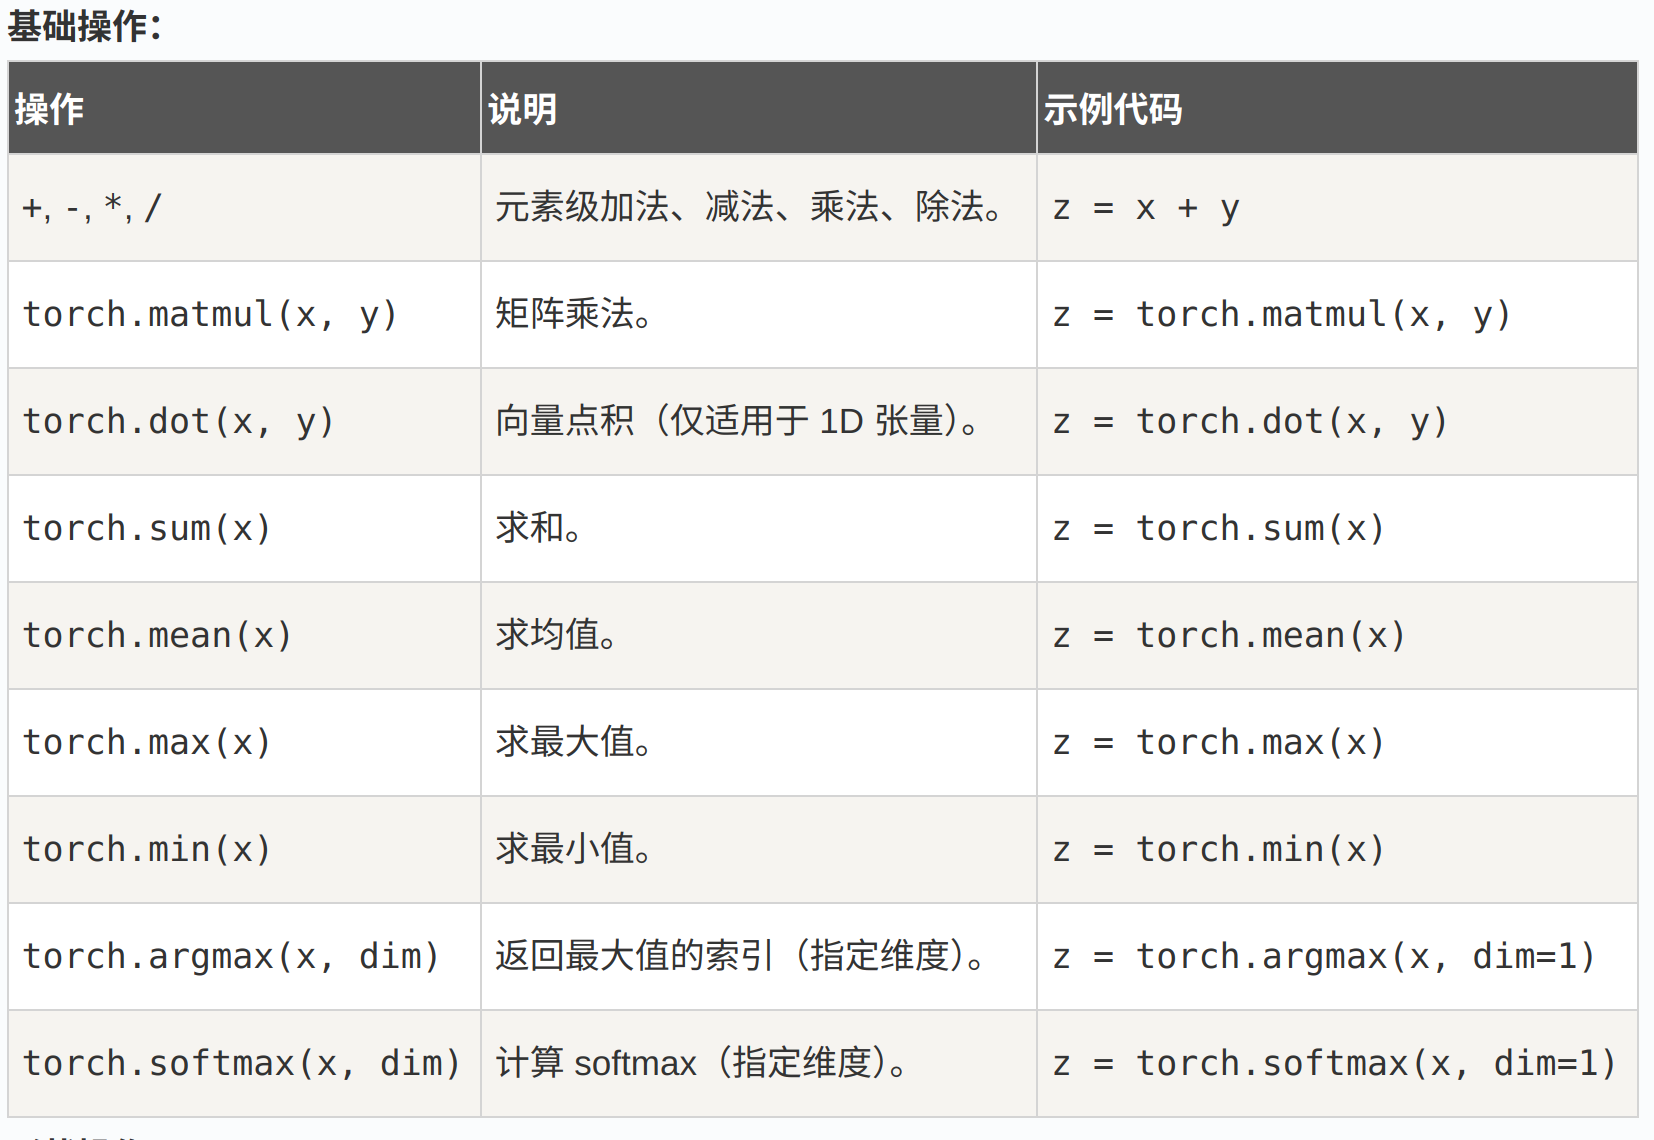

形状操作:
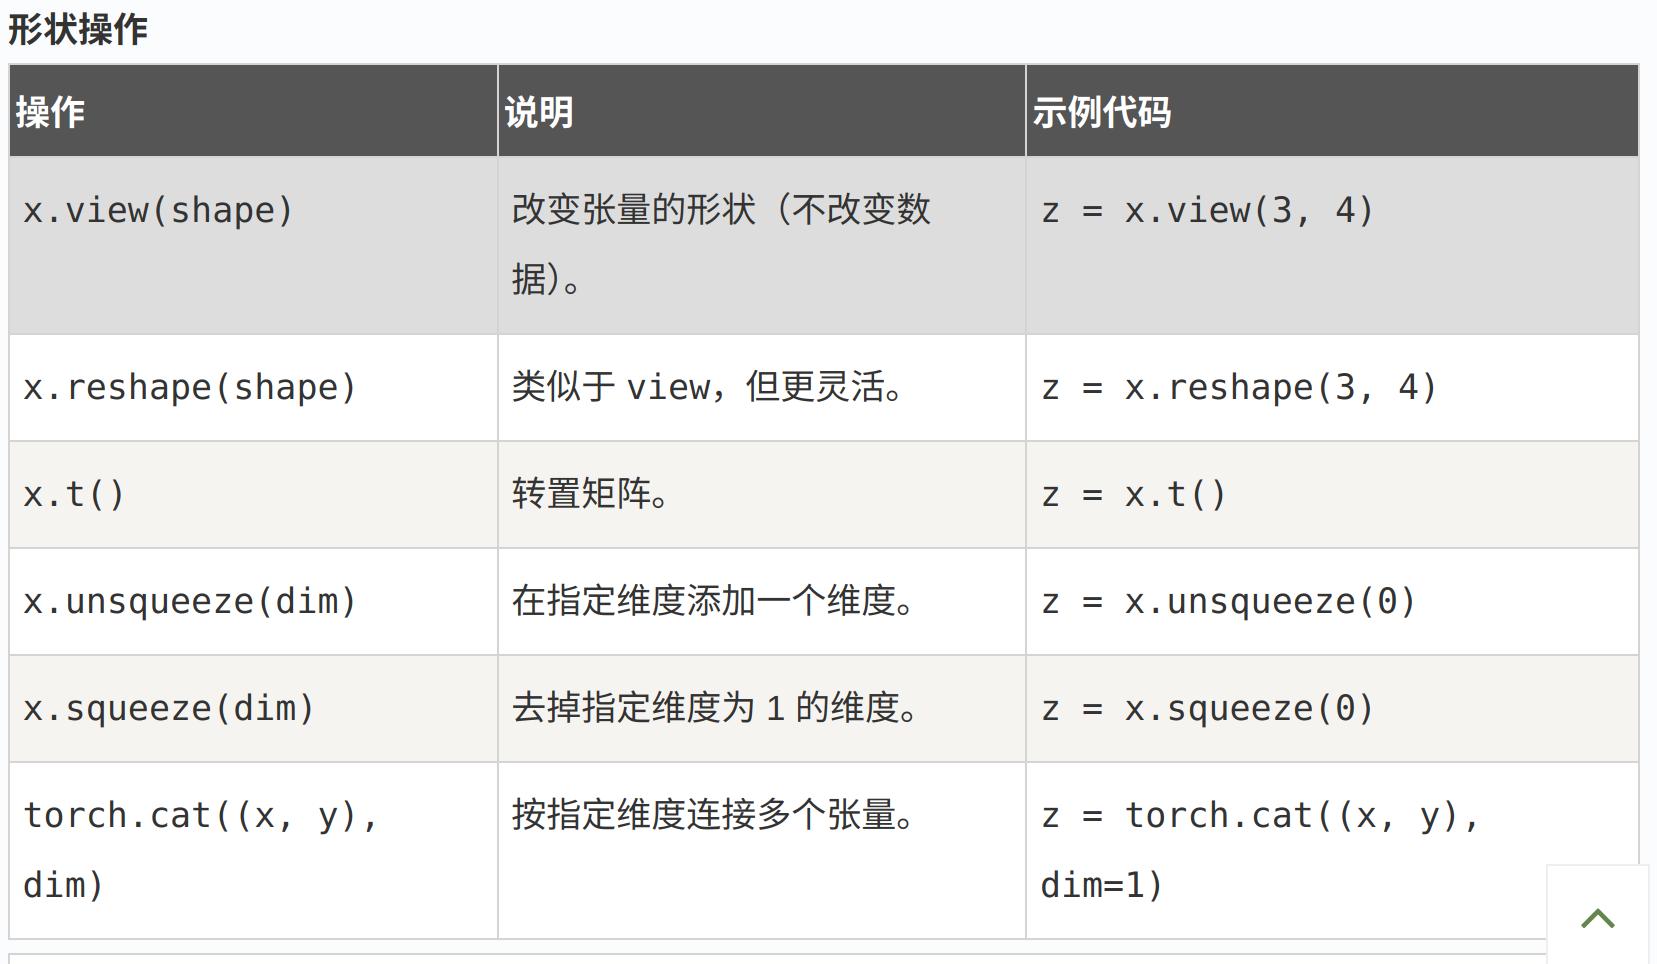

## 张量的 GPU 加速
- `torch.cuda.is_available()`: 表示机器上是否存在可用的 `gpu`
- `torch.device`: 返回一个 `device` 对象
对于一个张量可以使用 `to` 方法进行张量的移动或者模型的移动

In [7]:
# 1. 设置设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x = torch.tensor([1.0, 2.0, 3.0], device=device)

## 张量与 Numpy 的互操作
- `torch.from_numpy(ndarray)`: 将 `numpy` 数组转换为张量
- `x.numpy`: 张量转换为 `numpy` 数组(但是仅仅限与 `cpu` 张量)
但是直接使用这些函数创建张量或者 `ndarray` 而这共享内存, 需要使用 `clone` 函数完成数据的赋值

In [8]:
# 1. NumPy 数组转换为 PyTorch 张量
print("1. NumPy 转为 PyTorch 张量")
numpy_array = np.array([[1, 2, 3], [4, 5, 6]])
print("NumPy 数组:\n", numpy_array)

# 使用 torch.from_numpy() 将 NumPy 数组转换为张量
tensor_from_numpy = torch.from_numpy(numpy_array)
print("转换后的 PyTorch 张量:\n", tensor_from_numpy)

# 修改 NumPy 数组，观察张量的变化（共享内存）
numpy_array[0, 0] = 100
print("修改后的 NumPy 数组:\n", numpy_array)
print("PyTorch 张量也会同步变化:\n", tensor_from_numpy)

# 2. PyTorch 张量转换为 NumPy 数组
print("\n2. PyTorch 张量转为 NumPy 数组")
tensor = torch.tensor([[7, 8, 9], [10, 11, 12]], dtype=torch.float32)
print("PyTorch 张量:\n", tensor)

# 使用 tensor.numpy() 将张量转换为 NumPy 数组
numpy_from_tensor = tensor.numpy()
print("转换后的 NumPy 数组:\n", numpy_from_tensor)

# 修改张量，观察 NumPy 数组的变化（共享内存）
tensor[0, 0] = 77
print("修改后的 PyTorch 张量:\n", tensor)
print("NumPy 数组也会同步变化:\n", numpy_from_tensor)

# 3. 注意：不共享内存的情况（需要复制数据）
print("\n3. 使用 clone() 保证独立数据")
tensor_independent = torch.tensor([[13, 14, 15], [16, 17, 18]], dtype=torch.float32)
numpy_independent = tensor_independent.clone().numpy()  # 使用 clone 复制数据
print("原始张量:\n", tensor_independent)
tensor_independent[0, 0] = 0  # 修改张量数据
print("修改后的张量:\n", tensor_independent)
print("NumPy 数组（不会同步变化）:\n", numpy_independent)

1. NumPy 转为 PyTorch 张量
NumPy 数组:
 [[1 2 3]
 [4 5 6]]
转换后的 PyTorch 张量:
 tensor([[1, 2, 3],
        [4, 5, 6]])
修改后的 NumPy 数组:
 [[100   2   3]
 [  4   5   6]]
PyTorch 张量也会同步变化:
 tensor([[100,   2,   3],
        [  4,   5,   6]])

2. PyTorch 张量转为 NumPy 数组
PyTorch 张量:
 tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])
转换后的 NumPy 数组:
 [[ 7.  8.  9.]
 [10. 11. 12.]]
修改后的 PyTorch 张量:
 tensor([[77.,  8.,  9.],
        [10., 11., 12.]])
NumPy 数组也会同步变化:
 [[77.  8.  9.]
 [10. 11. 12.]]

3. 使用 clone() 保证独立数据
原始张量:
 tensor([[13., 14., 15.],
        [16., 17., 18.]])
修改后的张量:
 tensor([[ 0., 14., 15.],
        [16., 17., 18.]])
NumPy 数组（不会同步变化）:
 [[13. 14. 15.]
 [16. 17. 18.]]
